# Draw the Plot of SHAP with all Variables

In [1]:
%pwd

'/mnt/g/D-storage/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/g/D-storage/ESG09_Article


/home/linux/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [26]:
from scipy.stats import ttest_ind
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

## Load Dataset

In [4]:
filename_list = glob('Results/ShapAll_120k/*')

In [5]:
len(filename_list)

120

In [6]:
df_list = []
for filename in filename_list:
    sing_df = pd.read_parquet(filename)
    df_list.append(sing_df)

In [7]:
Concat_Shap = pd.concat(df_list, axis=0)

In [8]:
Concat_Shap.shape

(120000, 127)

## Reviewer 1 Comments 7 Shap Directly Fail here

In [10]:
Concat_Shap.head()

,Cantril_ladder,wave,INCOME_2,Health_disable,Relative_have,Living_standard_change,Enough_food,Enough_shelter,Well_rested,Respected,...,Corruption_government_shap,Performance_leadership_shap,Gender_female_shap,Age_shap,Marital_status_shap,Employment_shap,Children_under15_shap,Feeling_income_shap,Income_level_shap,COUNTRY_ISO3_shap
20,7.0,16,53201.839666,2.0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.248126,0.000000,0.000000,0.000000,0.047534,0.000000,0.000000,0.277958,0.000000,0.354573
24,2.0,11,1576.820968,2.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,0.055040,0.000000,-0.031531,0.062238,0.127393,0.201309,0.000000,-0.229387,0.184414,-0.137897
29,7.0,15,14784.932307,2.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.000000,0.083371,0.081361,0.000000,-0.230842,-0.082167,-0.091555,-0.203665,0.058620,0.180709
31,9.0,10,37183.358580,2.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.033324,0.000000,0.000000,0.069091,0.000000,0.000000,0.208146,0.000000,0.525652
33,3.0,7,4611.683055,1.0,0.0,-0.0,1.0,0.0,0.0,1.0,...,0.000000,-0.013114,0.120524,0.000000,-0.063950,0.000000,0.000000,-0.130189,0.000000,-0.145691


In [22]:
Concat_Shap.columns[64:]

Index(['wave_shap', 'INCOME_2_shap', 'Health_disable_shap',
       'Relative_have_shap', 'Living_standard_change_shap', 'Enough_food_shap',
       'Enough_shelter_shap', 'Well_rested_shap', 'Respected_shap',
       'Smile_shap', 'Interesting_thing_shap', 'Enjoyment_shap',
       'Physical_pain_shap', 'Worry_shap', 'Sadness_shap', 'Stress_shap',
       'Anger_shap', 'City_satisficied_shap', 'Economic_change_shap',
       'Goodtime_job_shap', 'Sat_pubtran_shap', 'Sat_road_shap',
       'Sat_edu_shap', 'Sat_qualityair_shap', 'Sat_qualitywater_shap',
       'Sat_healthcare_shap', 'Sat_affhouse_shap', 'Sat_oppofriend_shap',
       'Good_minorities_shap', 'Good_gayles_shap', 'Good_immigrants_shap',
       'Donated_shap', 'Volunteer_shap', 'Help_stranger_shap',
       'Voice_official_shap', 'Local_police_shap', 'Safety_walk_shap',
       'Stolen_shap', 'Assualted_shap', 'Religion_importance_shap',
       'Children_respected_shap', 'Children_learn_shap',
       'Women_respected_shap', 'Sat_dea

### Economic Analysis

In [16]:
Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Income_level_shap'].mean()

-0.051769506

In [17]:
Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Income_level_shap'].mean()

-0.050715324

In [18]:
Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Income_level_shap'].mean()

-0.054403223

In [30]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Income_level_shap'], Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Income_level_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.4207
P-value: 0.1554


In [31]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Income_level_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Income_level_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 2.3444
P-value: 0.0191


In [32]:
t_stat, p_value = ttest_ind( Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Income_level_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Income_level_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.0160
P-value: 0.0026


### Feeling_income_shap 

In [19]:
Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Feeling_income_shap'].mean()

0.057478867

In [20]:
Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Feeling_income_shap'].mean()

0.07035996

In [21]:
Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Feeling_income_shap'].mean()

0.09770239

In [33]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Feeling_income_shap'], Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Feeling_income_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -7.9935
P-value: 0.0000


In [34]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Feeling_income_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Feeling_income_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -16.8167
P-value: 0.0000


In [35]:
t_stat, p_value = ttest_ind( Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Feeling_income_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Feeling_income_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -10.3249
P-value: 0.0000


### Physical_pain_shap

In [23]:
Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Physical_pain_shap'].mean()

-0.009533933

In [24]:
Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Physical_pain_shap'].mean()

-0.010617035

In [25]:
Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Physical_pain_shap'].mean()

-0.014281223

In [27]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Physical_pain_shap'], Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Physical_pain_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.4016
P-value: 0.0007


In [28]:
t_stat, p_value = ttest_ind(Concat_Shap[Concat_Shap['Age'] <= 40].loc[:,'Physical_pain_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Physical_pain_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 9.8589
P-value: 0.0000


In [29]:
t_stat, p_value = ttest_ind( Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)].loc[:,'Physical_pain_shap'], Concat_Shap[Concat_Shap['Age'] > 65].loc[:,'Physical_pain_shap'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 6.6727
P-value: 0.0000


### ALL

In [147]:
yo_df = Concat_Shap[(Concat_Shap['Age'] <= 40)]

In [148]:
ma_df = Concat_Shap[(Concat_Shap['Age'] > 40)&(Concat_Shap['Age'] <= 65)]

In [149]:
el_df = Concat_Shap[Concat_Shap['Age'] > 65]

In [155]:
yo_df[yo_df['Sat_healthcare']==1]['Sat_healthcare_shap'].mean()

0.06895096

In [156]:
ma_df[ma_df['Sat_healthcare']==1]['Sat_healthcare_shap'].mean()

0.07436622

In [154]:
el_df[el_df['Sat_healthcare']==1]['Sat_healthcare_shap'].mean()

0.08759071

In [157]:
yo_df[yo_df['Sat_healthcare']==0]['Sat_healthcare_shap'].mean()

0.0015421476

In [158]:
ma_df[ma_df['Sat_healthcare']==0]['Sat_healthcare_shap'].mean()

0.0013148282

In [159]:
el_df[el_df['Sat_healthcare']==0]['Sat_healthcare_shap'].mean()

0.0011671718

In [131]:
yo_df[yo_df['Health_disable']==1]['Sat_healthcare_shap'].mean()

0.006060832

In [132]:
ma_df[ma_df['Health_disable']==1]['Sat_healthcare_shap'].mean()

0.010873929

In [133]:
el_df[el_df['Health_disable']==1]['Sat_healthcare_shap'].mean()

0.0245708

In [140]:
yo_df.columns[:64]

Index(['Cantril_ladder', 'wave', 'INCOME_2', 'Health_disable', 'Relative_have',
       'Living_standard_change', 'Enough_food', 'Enough_shelter',
       'Well_rested', 'Respected', 'Smile', 'Interesting_thing', 'Enjoyment',
       'Physical_pain', 'Worry', 'Sadness', 'Stress', 'Anger',
       'City_satisficied', 'Economic_change', 'Goodtime_job', 'Sat_pubtran',
       'Sat_road', 'Sat_edu', 'Sat_qualityair', 'Sat_qualitywater',
       'Sat_healthcare', 'Sat_affhouse', 'Sat_oppofriend', 'Good_minorities',
       'Good_gayles', 'Good_immigrants', 'Donated', 'Volunteer',
       'Help_stranger', 'Voice_official', 'Local_police', 'Safety_walk',
       'Stolen', 'Assualted', 'Religion_importance', 'Children_respected',
       'Children_learn', 'Women_respected', 'Sat_dealpoor', 'Sat_perserveenv',
       'Freedom_chooselife', 'Conf_military', 'Conf_judicial',
       'Conf_government', 'Conf_financial', 'Conf_honestyelections',
       'Freedom_media', 'Corruption_business', 'Corruption_governm

In [141]:
yo_df['Goodtime_job'].mean()

0.3675196484930998

In [142]:
ma_df['Goodtime_job'].mean()

0.3134092270820851

In [143]:
el_df['Goodtime_job'].mean()

0.27113424737884007

In [144]:
yo_df['Goodtime_job_shap'].mean()

0.026641704

In [145]:
ma_df['Goodtime_job_shap'].mean()

0.025052933

In [146]:
el_df['Goodtime_job_shap'].mean()

0.025615232

In [88]:
yo_df['Income_level'].corr(yo_df['Feeling_income'])

-0.31064906504013684

In [89]:
ma_df['Income_level'].corr(ma_df['Feeling_income'])

-0.37108660820178624

In [90]:
el_df['Income_level'].corr(el_df['Feeling_income'])

-0.3354012600538166

In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape for sklearn (expects 2D for X)
X = yo_df[['Income_level']]  # Already 2D
y = yo_df['Feeling_income']         # 1D target

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope: {model.coef_[0]:.4f}")

# R^2 score
r2 = model.score(X, y)
print(f"R²: {r2:.4f}")


Intercept: 3.0364
Slope: -0.2117
R²: 0.0965


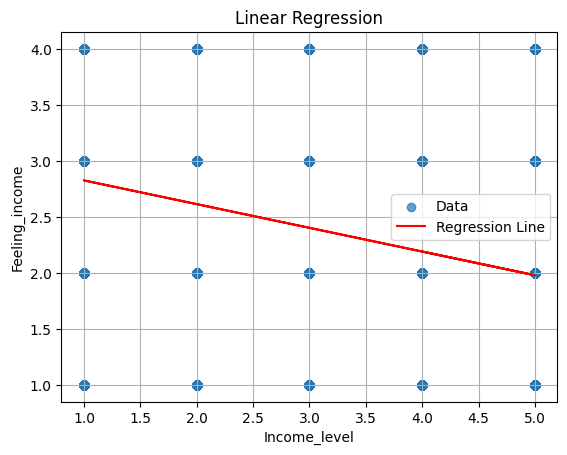

In [95]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Income_level')
plt.ylabel('Feeling_income')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape for sklearn (expects 2D for X)
X = ma_df[['Income_level']]  # Already 2D
y = ma_df['Feeling_income']         # 1D target

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope: {model.coef_[0]:.4f}")

# R^2 score
r2 = model.score(X, y)
print(f"R²: {r2:.4f}")


Intercept: 3.1246
Slope: -0.2503
R²: 0.1377


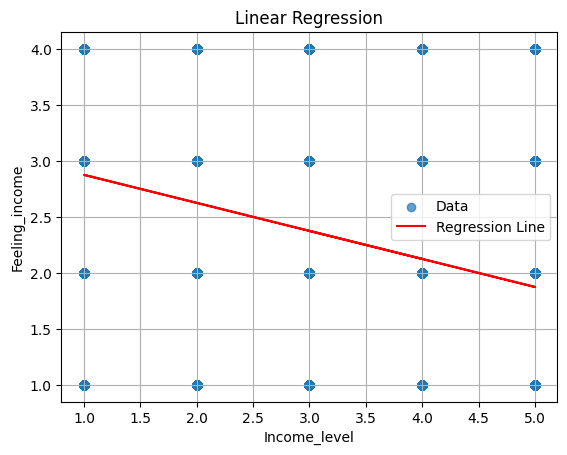

In [97]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Income_level')
plt.ylabel('Feeling_income')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape for sklearn (expects 2D for X)
X = el_df[['Income_level']]  # Already 2D
y = el_df['Feeling_income']         # 1D target

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope: {model.coef_[0]:.4f}")

# R^2 score
r2 = model.score(X, y)
print(f"R²: {r2:.4f}")


Intercept: 2.9664
Slope: -0.2310
R²: 0.1125


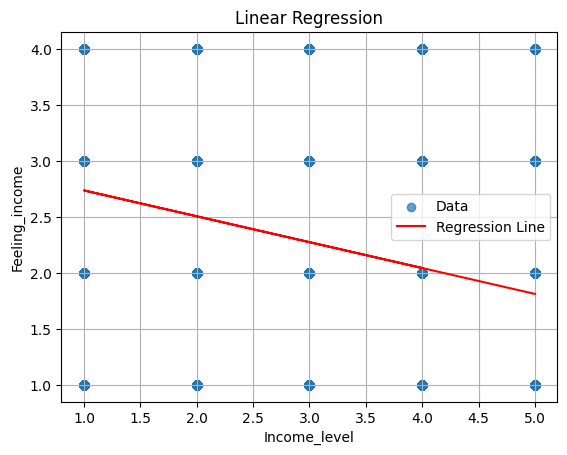

In [99]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Income_level')
plt.ylabel('Feeling_income')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


## Reviewer 1 Comment 7 Model Importance

In [204]:
import numpy as np
import os 
import pandas as pd
import random
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import xgboost as xgb

In [193]:
Df_Filename = os.path.join("Data", "GallupWB_Ml64var1911k14wave_v1.parquet")
Df = pd.read_parquet(Df_Filename)
Df = Df.sample(frac=1, random_state=42)
Df['COUNTRY_ISO3'] = Df['COUNTRY_ISO3'].astype('category')

In [194]:
Df_young = Df.loc[Df['Age']<=40, :].drop(columns=['Age'])
Df_middle = Df.loc[(Df['Age']>40)&(Df['Age']<=65), :].drop(columns=['Age'])
Df_old = Df.loc[Df['Age']>65, :].drop(columns=['Age'])

In [195]:
yy = Df_young['Cantril_ladder']
Xy = Df_young.drop(columns=['Cantril_ladder'])
ym = Df_middle['Cantril_ladder']
Xm = Df_middle.drop(columns=['Cantril_ladder'])
yo = Df_old['Cantril_ladder']
Xo = Df_old.drop(columns=['Cantril_ladder'])

### Young

In [215]:
yo_params = {'gamma': 6.6360850776123375,
 'learning_rate': 0.02519085390684862,
 'max_delta_step': 3.0662510776734475,
 'max_depth': 8,
 'min_child_weight': 0.03343944487838535,
 'n_estimators': 1136,
 'reg_alpha': 0.001000562456331363,
 'reg_lambda': 0.030390787275205566,
 'subsample': 0.7971894567956928}

In [216]:
X_train, X_test, y_train, y_test = train_test_split(Xy, yy, test_size=0.1, random_state=42)

# Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    tree_method='hist',
    random_state=42,
    enable_categorical=True,
    **yo_params
)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=6.6360850776123375, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02519085390684862,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=3.0662510776734475, max_depth=8, max_leaves=None,
             min_child_weight=0.03343944487838535, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1136,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [217]:
# Create a DataFrame of feature importances with names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print("Feature Importances (gain-based):")
print(importance_df)

Feature Importances (gain-based):
                   Feature  Importance
4   Living_standard_change    0.169231
59          Feeling_income    0.149080
5              Enough_food    0.059678
61            COUNTRY_ISO3    0.045864
3            Relative_have    0.040035
..                     ...         ...
40      Children_respected    0.006024
38               Assualted    0.006013
42         Women_respected    0.006009
52     Corruption_business    0.005937
51           Freedom_media    0.005874

[62 rows x 2 columns]


In [218]:
yo_importance_df = importance_df.copy()

In [219]:
yo_importance_df

,Feature,Importance
4,Living_standard_change,0.169231
59,Feeling_income,0.149080
5,Enough_food,0.059678
61,COUNTRY_ISO3,0.045864
3,Relative_have,0.040035
...,...,...
40,Children_respected,0.006024
38,Assualted,0.006013
42,Women_respected,0.006009
52,Corruption_business,0.005937


### Middle Age

In [207]:
ma_params = {'gamma': 0.05965055817863728,
 'learning_rate': 0.016150250040658724,
 'max_delta_step': 0.10042448556024319,
 'max_depth': 13,
 'min_child_weight': 1.7624628686422215,
 'n_estimators': 3304,
 'reg_alpha': 10.0,
 'reg_lambda': 0.002893997263318717,
 'subsample': 0.8956214250879957}

In [208]:
X_train, X_test, y_train, y_test = train_test_split(Xy, yy, test_size=0.1, random_state=42)

# Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    tree_method='hist',
    random_state=42,
    enable_categorical=True,
    **ma_params
)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.05965055817863728, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.016150250040658724,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=0.10042448556024319, max_depth=13, max_leaves=None,
             min_child_weight=1.7624628686422215, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=3304,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [209]:
# Create a DataFrame of feature importances with names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print("Feature Importances (gain-based):")
print(importance_df)

Feature Importances (gain-based):
                   Feature  Importance
59          Feeling_income    0.175637
5              Enough_food    0.088010
61            COUNTRY_ISO3    0.079147
4   Living_standard_change    0.068064
3            Relative_have    0.043860
..                     ...         ...
37                  Stolen    0.007128
29             Good_gayles    0.007099
8                Respected    0.006823
39     Religion_importance    0.006684
38               Assualted    0.005641

[62 rows x 2 columns]


In [210]:
ma_importance_df = importance_df.copy()

### Elder

In [211]:
ma_params = {'gamma': 1.2045479993021058,
 'learning_rate': 0.030685320506680522,
 'max_delta_step': 0.3805781770349062,
 'max_depth': 13,
 'min_child_weight': 0.002361695637610135,
 'n_estimators': 540,
 'reg_alpha': 6.59041086695112,
 'reg_lambda': 0.01642699361057668,
 'subsample': 0.5572023993404673}

In [212]:
X_train, X_test, y_train, y_test = train_test_split(Xy, yy, test_size=0.1, random_state=42)

# Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    tree_method='hist',
    random_state=42,
    enable_categorical=True,
    **ma_params
)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=1.2045479993021058, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.030685320506680522,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=0.3805781770349062, max_depth=13, max_leaves=None,
             min_child_weight=0.002361695637610135, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=540,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [213]:
# Create a DataFrame of feature importances with names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print("Feature Importances (gain-based):")
print(importance_df)

Feature Importances (gain-based):
                   Feature  Importance
61            COUNTRY_ISO3    0.085467
59          Feeling_income    0.081951
4   Living_standard_change    0.075587
3            Relative_have    0.037140
5              Enough_food    0.035796
..                     ...         ...
52     Corruption_business    0.010769
29             Good_gayles    0.010678
38               Assualted    0.010448
58        Children_under15    0.010247
39     Religion_importance    0.009427

[62 rows x 2 columns]


In [214]:
el_importance_df = importance_df.copy()

In [220]:
importance_df_merge = yo_importance_df.merge(ma_importance_df, on = 'Feature')
importance_df_merge = importance_df_merge.merge(el_importance_df, on = 'Feature')

In [222]:
importance_df_merge.columns = ['Feature', 'Younger', 'Middle-Aged', 'Elder']

In [224]:
importance_df_merge = importance_df_merge.set_index('Feature')

In [226]:
custom_order = [
    'INCOME_2', 'Health_disable', 'Gender_female',
    'Marital_status', # 5
    'Employment', 'Children_under15', 'Feeling_income', 'Income_level', # 9
    'Relative_have', # 10
    'Living_standard_change', 'Enough_food', 'Enough_shelter', # 13
    'Well_rested', 'Respected', 'Smile', 'Interesting_thing', 'Enjoyment', # 18
    'Physical_pain', 'Worry', 'Sadness', 'Stress', 'Anger', # 23
    'City_satisficied', 'Economic_change', 'Goodtime_job', 'Sat_pubtran', # 27
    'Sat_road', 'Sat_edu', 'Sat_qualityair', 'Sat_qualitywater', # 31
    'Sat_healthcare', 'Sat_affhouse', 'Sat_oppofriend', 'Good_minorities', # 35
    'Good_gayles', 'Good_immigrants', 'Donated', 'Volunteer', # 39
    'Help_stranger', 'Voice_official', 'Local_police', 'Safety_walk', # 43
    'Stolen', 'Assualted', 'Religion_importance', 'Children_respected', # 47
    'Children_learn', 'Women_respected', 'Sat_dealpoor', 'Sat_perserveenv', # 51
    'Freedom_chooselife', 'Conf_military', 'Conf_judicial', # 54
    'Conf_government', 'Conf_financial', 'Conf_honestyelections', # 57
    'Freedom_media', 'Corruption_business', 'Corruption_government', # 60
    'Performance_leadership' # 61
]

# Reorder the index of importance_df_merge based on custom list
importance_df_merge = importance_df_merge.loc[custom_order]

In [227]:
importance_df_merge.index = ["Household Income", "Health Disability", "Female Dummy", #5 5
             'Marital Status', #1 6
             'Employment', 'Children Under 15', 'Feeling of Income', 'Income Level', #4 10
            "Having Relatives to Rely on", #1 11
             "Living Standard Changing Direction", "Enough Food", "Enough Shelter", #3 14
             "Well Rested", "Respected", 'Smiling', 'Interesting Things', 'Enjoyment', #5 19
            "Physical Pain", "Worry", "Sadness", "Stress", "Anger", #5 24
            "Satisfied with City", "Economic Changing Direction", "Good Time to Find Job", "Satisfied with Public Transportation", #4 28
            "Satisfied with Road", "Satisfied with Education", "Satisfied with Air Quality", "Satisfied with Water Quality", #4 32
            "Satisfied with Healthcare", "Satisfied with Affordable House", "Satisfied with Opportunity to Make Friends", "Good Place for Ethitical Minority", #4 36
            "Good Place for Gay or Lesbian", "Good Place for Immigrants", "Donated Recently", "Did Volunteer Recently", #4 40
            "Helped Stranger", "Voiced Opinion to Official", "Confidence in Local Police", "Safety of Alone Night Walking", #4 44
            'Stolen', 'Assaulted', 'Religion Importance', 'Children Respected', #4 48
            'Opportunity for Children Learning', 'Women Respected', 'Satisfied with Poverty Alleviation', 'Satisfied with Environmental Efforts', #4 52
            "Freedom of Choosing Life", "Confidence in Military", "Confidence in Judicial System", #3 55
             "Confidence in National Government", "Confidence in Financial System", "Confidence in Election Honesty", #3 58
            "Freedom of Media", "Corruption within Business", "Corruption within Government", #3 61
             "Approval of Leadership Performance"]

In [229]:
importance_df_merge.to_excel('Results/Models3_Importance.xlsx')

## Reviewer 1 comment 15

### Plot

In [172]:
# Group by Age and calculate percentiles
summary_df = Concat_Shap.groupby('Age')['Age_shap'].agg(
    mean='mean',
    q05=lambda x: x.quantile(0.05),
    q95=lambda x: x.quantile(0.95)
).reset_index()

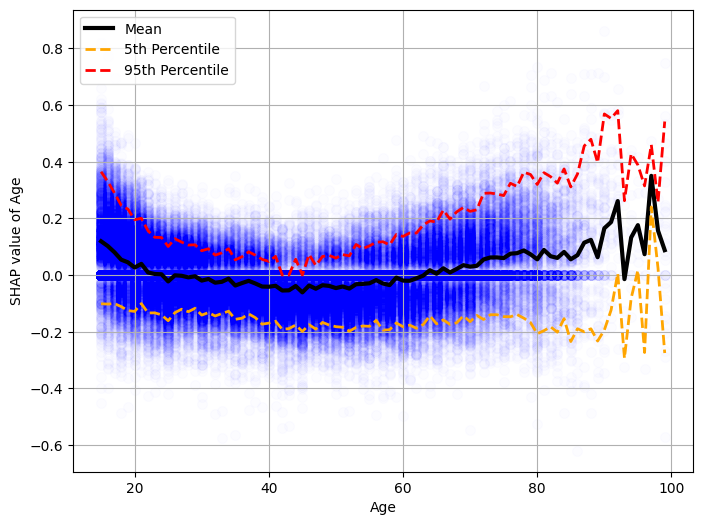

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(Concat_Shap['Age'], Concat_Shap['Age_shap'], color='blue', alpha = 0.01, marker = '.', s=200)

# Overlay percentiles
plt.plot(summary_df['Age'], summary_df['mean'], color='black', label='Mean', linewidth=3)
plt.plot(summary_df['Age'], summary_df['q05'], color='orange', linestyle='--', label='5th Percentile', linewidth=2)
plt.plot(summary_df['Age'], summary_df['q95'], color='red', linestyle='--', label='95th Percentile', linewidth=2)


plt.xlabel('Age')
plt.ylabel('SHAP value of Age')
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('Figures/AgeSHAP.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Comment 8

### All data

In [232]:
Df_Filename = os.path.join("Data", "GallupWB_Ml64var1911k14wave_v1.parquet")

In [233]:
Df = pd.read_parquet(Df_Filename)

In [234]:
Df.columns

Index(['wave', 'INCOME_2', 'Cantril_ladder', 'Health_disable', 'Relative_have',
       'Living_standard_change', 'Enough_food', 'Enough_shelter',
       'Well_rested', 'Respected', 'Smile', 'Interesting_thing', 'Enjoyment',
       'Physical_pain', 'Worry', 'Sadness', 'Stress', 'Anger',
       'City_satisficied', 'Economic_change', 'Goodtime_job', 'Sat_pubtran',
       'Sat_road', 'Sat_edu', 'Sat_qualityair', 'Sat_qualitywater',
       'Sat_healthcare', 'Sat_affhouse', 'Sat_oppofriend', 'Good_minorities',
       'Good_gayles', 'Good_immigrants', 'Donated', 'Volunteer',
       'Help_stranger', 'Voice_official', 'Local_police', 'Safety_walk',
       'Stolen', 'Assualted', 'Religion_importance', 'Children_respected',
       'Children_learn', 'Women_respected', 'Sat_dealpoor', 'Sat_perserveenv',
       'Freedom_chooselife', 'Conf_military', 'Conf_judicial',
       'Conf_government', 'Conf_financial', 'Conf_honestyelections',
       'Freedom_media', 'Corruption_business', 'Corruption_governm

### Compare "satisfaction with medical care" and "employment opportunities"

In [242]:
yo_df.columns

Index(['wave', 'INCOME_2', 'Cantril_ladder', 'Health_disable', 'Relative_have',
       'Living_standard_change', 'Enough_food', 'Enough_shelter',
       'Well_rested', 'Respected', 'Smile', 'Interesting_thing', 'Enjoyment',
       'Physical_pain', 'Worry', 'Sadness', 'Stress', 'Anger',
       'City_satisficied', 'Economic_change', 'Goodtime_job', 'Sat_pubtran',
       'Sat_road', 'Sat_edu', 'Sat_qualityair', 'Sat_qualitywater',
       'Sat_healthcare', 'Sat_affhouse', 'Sat_oppofriend', 'Good_minorities',
       'Good_gayles', 'Good_immigrants', 'Donated', 'Volunteer',
       'Help_stranger', 'Voice_official', 'Local_police', 'Safety_walk',
       'Stolen', 'Assualted', 'Religion_importance', 'Children_respected',
       'Children_learn', 'Women_respected', 'Sat_dealpoor', 'Sat_perserveenv',
       'Freedom_chooselife', 'Conf_military', 'Conf_judicial',
       'Conf_government', 'Conf_financial', 'Conf_honestyelections',
       'Freedom_media', 'Corruption_business', 'Corruption_governm

In [243]:
yo_df['Goodtime_job'].mean()

0.3681105225694209

In [244]:
ma_df['Goodtime_job'].mean()

0.3108489947601846

In [245]:
el_df['Goodtime_job'].mean()

0.2660383895779918

In [251]:
yo_df[yo_df['Health_disable']==2]['Sat_healthcare'].mean()

0.5344845530017373

In [252]:
ma_df[ma_df['Health_disable']==2]['Sat_healthcare'].mean()

0.5740198270315073

In [253]:
el_df[el_df['Health_disable']==2]['Sat_healthcare'].mean()

0.6743852553201268

In [254]:
yo_df['Sat_healthcare'].mean()

0.5243702808643352

In [255]:
ma_df['Sat_healthcare'].mean()

0.5505302355581074

In [256]:
el_df['Sat_healthcare'].mean()

0.6189822835100363

### Sat_healthcare

In [275]:
results = []

for country in set(yo_df['COUNTRY_ISO3']) & set(ma_df['COUNTRY_ISO3']):
    group1 = yo_df[yo_df['COUNTRY_ISO3'] == country]['Sat_healthcare'].dropna().mean()
    group2 = ma_df[ma_df['COUNTRY_ISO3'] == country]['Sat_healthcare'].dropna().mean()
    group3 = el_df[el_df['COUNTRY_ISO3'] == country]['Sat_healthcare'].dropna().mean()

    results.append({'Country_ISO3': country, 'group1': group1, 'group2': group2,
                'group3': group3
                   })
    
results_df = pd.DataFrame(results)
print(results_df)

    Country_ISO3    group1    group2    group3
0            ARG  0.534428  0.560873  0.671692
1            AUT  0.887550  0.879628  0.889486
2            CRI  0.636719  0.683266  0.823529
3            ZAF  0.569456  0.572645  0.535211
4            BEN  0.401981  0.395699  0.386301
..           ...       ...       ...       ...
159          CHN  0.457776  0.444251  0.425982
160          KAZ  0.485491  0.446777  0.439771
161          ARE  0.786680  0.766746  0.858586
162          COG  0.324302  0.275203  0.243750
163          EGY  0.357372  0.354001  0.421594

[164 rows x 4 columns]


In [276]:
results_df.columns = ['Country', 'Younger', 'Middle-Aged', 'Elderly']

In [277]:
group_columns = ['Younger', 'Middle-Aged', 'Elderly']
results_df['Group Least Satisfied'] = results_df[group_columns].idxmin(axis=1)

In [278]:
print(results_df)

    Country   Younger  Middle-Aged   Elderly Group Least Satisfied
0       ARG  0.534428     0.560873  0.671692               Younger
1       AUT  0.887550     0.879628  0.889486           Middle-Aged
2       CRI  0.636719     0.683266  0.823529               Younger
3       ZAF  0.569456     0.572645  0.535211               Elderly
4       BEN  0.401981     0.395699  0.386301               Elderly
..      ...       ...          ...       ...                   ...
159     CHN  0.457776     0.444251  0.425982               Elderly
160     KAZ  0.485491     0.446777  0.439771               Elderly
161     ARE  0.786680     0.766746  0.858586           Middle-Aged
162     COG  0.324302     0.275203  0.243750               Elderly
163     EGY  0.357372     0.354001  0.421594           Middle-Aged

[164 rows x 5 columns]


In [281]:
results_df['Group Least Satisfied'].value_counts()

Group Least Satisfied
Middle-Aged    83
Younger        43
Elderly        38
Name: count, dtype: int64

In [282]:
results_df.to_excel('Results/Sat_healthcare_Country.xlsx')

### Goodtime_job

In [283]:
results = []

for country in set(yo_df['COUNTRY_ISO3']) & set(ma_df['COUNTRY_ISO3']):
    group1 = yo_df[yo_df['COUNTRY_ISO3'] == country]['Goodtime_job'].dropna().mean()
    group2 = ma_df[ma_df['COUNTRY_ISO3'] == country]['Goodtime_job'].dropna().mean()
    group3 = el_df[el_df['COUNTRY_ISO3'] == country]['Goodtime_job'].dropna().mean()

    results.append({'Country_ISO3': country, 'group1': group1, 'group2': group2,
                'group3': group3
                   })
    
results_df = pd.DataFrame(results)
print(results_df)

    Country_ISO3    group1    group2    group3
0            ARG  0.271478  0.220264  0.215243
1            AUT  0.407749  0.356904  0.324252
2            CRI  0.283654  0.227823  0.179769
3            ZAF  0.335042  0.295687  0.231612
4            BEN  0.381161  0.330753  0.326027
..           ...       ...       ...       ...
159          CHN  0.334631  0.238969  0.183564
160          KAZ  0.396524  0.351569  0.284895
161          ARE  0.518429  0.501188  0.585859
162          COG  0.434455  0.383092  0.204167
163          EGY  0.164769  0.159388  0.145244

[164 rows x 4 columns]


In [284]:
results_df.columns = ['Country', 'Younger', 'Middle-Aged', 'Elderly']

In [285]:
group_columns = ['Younger', 'Middle-Aged', 'Elderly']
results_df['Group Least Satisfied'] = results_df[group_columns].idxmin(axis=1)

In [286]:
print(results_df)

    Country   Younger  Middle-Aged   Elderly Group Least Satisfied
0       ARG  0.271478     0.220264  0.215243               Elderly
1       AUT  0.407749     0.356904  0.324252               Elderly
2       CRI  0.283654     0.227823  0.179769               Elderly
3       ZAF  0.335042     0.295687  0.231612               Elderly
4       BEN  0.381161     0.330753  0.326027               Elderly
..      ...       ...          ...       ...                   ...
159     CHN  0.334631     0.238969  0.183564               Elderly
160     KAZ  0.396524     0.351569  0.284895               Elderly
161     ARE  0.518429     0.501188  0.585859           Middle-Aged
162     COG  0.434455     0.383092  0.204167               Elderly
163     EGY  0.164769     0.159388  0.145244               Elderly

[164 rows x 5 columns]


In [287]:
results_df['Group Least Satisfied'].value_counts()

Group Least Satisfied
Elderly        134
Middle-Aged     23
Younger          7
Name: count, dtype: int64